# Data Wrangling
ในบทนี้ จะเป็นการแนะนำการทำ Data Wrangling หรือการเตรียมข้อมูล ด้วยภาษา `R`

Data Wrangling เป็น ขั้นตอนในการเตรียมข้อมูลเพื่อการวิเคราะห์ซึ่งจะรวมถึงขั้นตอน
- import data หมายถึง การนำเข้าข้อมูลจากหลากหลายแหล่ง
- tidy data หมายถึง การจัดรูปแบบของข้อมูล เช่น การ reshape ข้อมูล
- transform data หมายถึง การแปลงข้อมูล การทำ feature engineering เป็นต้น

![](https://d33wubrfki0l68.cloudfront.net/571b056757d68e6df81a3e3853f54d3c76ad6efc/32d37/diagrams/data-science.png)

# Install and Load packages

In [ ]:
options(
  repr.plot.width=10, 
  repr.plot.height=6, 
  repr.plot.res = 300,
  repr.matrix.max.rows = 10,
  repr.matrix.max.cols = Inf
)

In [ ]:
# if running on google colab
options("repos" = "https://packagemanager.rstudio.com/cran/__linux__/bionic/latest/")
install.packages("RPostgres")
install.packages("writexl")

In [1]:
library(tidyverse)
library(DBI)
library(RPostgres)
library(httr)
library(vroom)
library(readxl)
library(writexl)

-- Attaching packages ------------------------------------------------------------------------------------------------------------------------------------------------ tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts --------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



# Load Data

## setting path

In [2]:
getwd()

[1] "C:/Users/Acer/Google Drive/workshop/2021-08-24_introR/notebook"

In [3]:
setwd("..")
getwd()

[1] "C:/Users/Acer/Google Drive/workshop/2021-08-24_introR"

## csv

In [4]:
df_csv <- read_csv("data/production_oae.csv")
df_csv


-- Column specification -----------------------------------------------------------------------------------------------------------------------------------------------------------------
cols(
  commod = col_character(),
  subcommod = col_character(),
  season = col_double(),
  variety = col_character(),
  year_crop = col_character(),
  year = col_double(),
  province = col_character(),
  province_code = col_character(),
  reg_oae = col_character(),
  reg_nesdb = col_character(),
  reg_osrt = col_character(),
  status = col_character(),
  update_date = col_date(format = ""),
  area_plant = col_double(),
  area_harvest = col_double(),
  production = col_double(),
  yield_plant = col_double(),
  yield_harvest = col_double()
)




commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ประเทศไทย,TH00,NA,NA,NA,สถิติ,2556-11-21,56392231,53383281,15757745,279.4311,295.1813
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคเหนือ,TH01,NA,NA,NA,สถิติ,2556-11-21,12655814,12422132,5258621,415.5103,423.3268
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคตะวันออกเฉียงเหนือ,TH02,NA,NA,NA,สถิติ,2556-11-21,28000661,26103169,5389709,192.4851,206.4772
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคกลาง,TH03,NA,NA,NA,สถิติ,2556-11-21,11660934,11415444,4010097,343.8916,351.2870
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคใต้,TH06,NA,NA,NA,สถิติ,2556-11-21,4074822,3442536,1099318,269.7831,319.3338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุตรดิตถ์,TH53,N,N,N,พยากรณ์,2556-06-25,12631,12568,7882,624.0203,627.1483
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อำนาจเจริญ,TH37,NE,NE,NE,พยากรณ์,2556-06-25,510,510,237,464.7059,464.7059
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุบลราชธานี,TH34,NE,NE,NE,พยากรณ์,2556-06-25,40156,40036,19877,494.9945,496.4782


In [5]:
df_vroom <- vroom("data/production_oae.csv")
df_vroom

Rows: 18685 Columns: 18

-- Column specification -----------------------------------------------------------------------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (10): commod, subcommod, variety, year_crop, province, province_code, r...
dbl   (7): season, year, area_plant, area_harvest, production, yield_plant, ...
date  (1): update_date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ประเทศไทย,TH00,NA,NA,NA,สถิติ,2556-11-21,56392231,53383281,15757745,279.4311,295.1813
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคเหนือ,TH01,NA,NA,NA,สถิติ,2556-11-21,12655814,12422132,5258621,415.5103,423.3268
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคตะวันออกเฉียงเหนือ,TH02,NA,NA,NA,สถิติ,2556-11-21,28000661,26103169,5389709,192.4851,206.4772
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคกลาง,TH03,NA,NA,NA,สถิติ,2556-11-21,11660934,11415444,4010097,343.8916,351.2870
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคใต้,TH06,NA,NA,NA,สถิติ,2556-11-21,4074822,3442536,1099318,269.7831,319.3338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุตรดิตถ์,TH53,N,N,N,พยากรณ์,2556-06-25,12631,12568,7882,624.0203,627.1483
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อำนาจเจริญ,TH37,NE,NE,NE,พยากรณ์,2556-06-25,510,510,237,464.7059,464.7059
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุบลราชธานี,TH34,NE,NE,NE,พยากรณ์,2556-06-25,40156,40036,19877,494.9945,496.4782


## excel

In [6]:
df_excel <- read_excel("data/production_oae.xlsx")
df_excel

commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ประเทศไทย,TH00,NA,NA,NA,สถิติ,2556-11-21,56392231,53383281,15757745,279.4311,295.1813
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคเหนือ,TH01,NA,NA,NA,สถิติ,2556-11-21,12655814,12422132,5258621,415.5103,423.3268
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคตะวันออกเฉียงเหนือ,TH02,NA,NA,NA,สถิติ,2556-11-21,28000661,26103169,5389709,192.4851,206.4772
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคกลาง,TH03,NA,NA,NA,สถิติ,2556-11-21,11660934,11415444,4010097,343.8916,351.2870
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคใต้,TH06,NA,NA,NA,สถิติ,2556-11-21,4074822,3442536,1099318,269.7831,319.3338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุตรดิตถ์,TH53,N,N,N,พยากรณ์,2556-06-25,12631,12568,7882,624.0203,627.1483
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อำนาจเจริญ,TH37,NE,NE,NE,พยากรณ์,2556-06-25,510,510,237,464.7059,464.7059
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุบลราชธานี,TH34,NE,NE,NE,พยากรณ์,2556-06-25,40156,40036,19877,494.9945,496.4782


## rds

In [7]:
df_rds <- readRDS("data/production_oae.rds")
df_rds

commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ประเทศไทย,TH00,NA,NA,NA,สถิติ,2556-11-21,56392231,53383281,15757745,279.4311,295.1813
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคเหนือ,TH01,NA,NA,NA,สถิติ,2556-11-21,12655814,12422132,5258621,415.5103,423.3268
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคตะวันออกเฉียงเหนือ,TH02,NA,NA,NA,สถิติ,2556-11-21,28000661,26103169,5389709,192.4851,206.4772
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคกลาง,TH03,NA,NA,NA,สถิติ,2556-11-21,11660934,11415444,4010097,343.8916,351.2870
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคใต้,TH06,NA,NA,NA,สถิติ,2556-11-21,4074822,3442536,1099318,269.7831,319.3338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุตรดิตถ์,TH53,N,N,N,พยากรณ์,2556-06-25,12631,12568,7882,624.0203,627.1483
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อำนาจเจริญ,TH37,NE,NE,NE,พยากรณ์,2556-06-25,510,510,237,464.7059,464.7059
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุบลราชธานี,TH34,NE,NE,NE,พยากรณ์,2556-06-25,40156,40036,19877,494.9945,496.4782


## database

In [8]:
conn <- dbConnect(
  RPostgres::Postgres(),
  host = "192.168.4.133",
  user = "oae_user",
  password = "p@ssword",
  dbname = "db_nabc",
  options="-c search_path=definition"
)

In [9]:
dbListTables(conn)

[1] "tha3"                     "usda_attribute"          
 [3] "tha2"                     "usda_commod"             
 [5] "usda_country"             "usda_unit"               
 [7] "commod_oae"               "month_th"                
 [9] "price_fao_international"  "price_moc"               
[11] "price_oae"                "production_oae_attribute"
[13] "production_oae_class"     "production_oae_commod"   
[15] "production_oae_status"    "tha1"

In [10]:
ref <- list()
ref$tha1 <- dbReadTable(conn, "tha1")
ref$tha1

adm1_pcode,adm1_name_th,adm1_label_th,adm1_name_th_regex,adm1_name_en,adm1_label_en,adm1_name_en_regex,is_agg,code_oae,HASC_1,lat,lon,alt,reg_oae,reg_oae_rank,reg_nesdb,reg_nesdb_rank,reg_osrt,reg_osrt_rank
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
TH00,ประเทศไทย,ประเทศไทย,.*ประเทศ,Thailand,Thailand,NA,TRUE,000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH01,ภาคเหนือ,เหนือ,(ภาค)เหนือ$,North,North,NA,TRUE,001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH02,ภาคตะวันออกเฉียงเหนือ,ตอ.เฉียงเหนือ,.*เฉียงเหนือ$,Northeast,Northeast,NA,TRUE,002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH03,ภาคกลาง,กลาง,.*กลาง$,Central,Central,NA,TRUE,003,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH04,ภาคตะวันออก,ตะวันออก,.*ตะวันออก$,East,East,NA,TRUE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TH90,สงขลา,สงขลา,^(จ.)*สงขลา$,Songkhla,Songkhla,.*songkhla.*,FALSE,730,TH.SG,7.20,100.60,5.0,S,4,S,6,S,6
TH91,สตูล,สตูล,^(จ.)*สตูล$,Satun,Satun,.*satun.*,FALSE,740,TH.SA,6.88,99.79,7.0,S,4,S,6,S,6
TH94,ปัตตานี,ปัตตานี,^(จ.)*ปัตตานี$,Pattani,Pattani,.*pattani.*,FALSE,750,TH.PI,6.87,101.25,0.9,S,4,S,6,S,6


## API (Application Programming Interface)

In [11]:
# https://data.moc.go.th/OpenData/GISProductPrice
httr::set_config(config(ssl_verifypeer = 0L))
res <- httr::GET(
  "https://dataapi.moc.go.th/gis-product-prices?",
  query = list(
    product_id = "R11029",
    from_date = "2021-01-01",
    to_date = Sys.Date()
  )
)

In [12]:
res %>% httr::content("text") %>% jsonlite::fromJSON()

,date,price_min,price_max
,<chr>,<dbl>,<dbl>
1,2021-01-04T00:00:00,3050,3060
2,2021-01-05T00:00:00,3050,3060
3,2021-01-06T00:00:00,3050,3060
4,2021-01-07T00:00:00,3050,3060
5,2021-01-08T00:00:00,3050,3060
...,...,...,...
148,2021-08-17T00:00:00,2250,2260
149,2021-08-18T00:00:00,2250,2260
150,2021-08-19T00:00:00,2300,2310


In [13]:
res <- res %>% httr::content("text") %>% jsonlite::fromJSON()
res$price_list

,date,price_min,price_max
,<chr>,<dbl>,<dbl>
1,2021-01-04T00:00:00,3050,3060
2,2021-01-05T00:00:00,3050,3060
3,2021-01-06T00:00:00,3050,3060
4,2021-01-07T00:00:00,3050,3060
5,2021-01-08T00:00:00,3050,3060
...,...,...,...
148,2021-08-17T00:00:00,2250,2260
149,2021-08-18T00:00:00,2250,2260
150,2021-08-19T00:00:00,2300,2310


# Tidy Data Concept
Tidy data คือ การจัดการข้อมูลให้อยู่ในโครงสร้างตาราง โดยที่
1. column = ตัวแปร
2. row = ข้อมูล
3. cell = ค่าที่วัดได้

> Tidy data is a way to describe data that’s organized with a particular structure – a rectangular structure, where each variable has its own column, and each observation has its own row (Wickham 2014).
![](https://www.openscapes.org/img/blog/tidydata/tidydata_1.jpg)

# Data Wrangling/ Data Manipulation
การจัดการข้อมูลมี operation หลักๆ ดังนี้
- select
- filter
- mutate
- summarize
- arrange
- join

## select
คือ การเลือกตัวแปร หรือ column ที่ต้องการ โดยสามารถเปลี่ยนชื่อตัวแปรได้ด้วย

**Syntax:**
```{r}
df %>%
  select(
    column_x, new_column_y = column_y, ...
  )
```
Note: `%>%` คือ pipe operator ซึ่งจะนำ object ที่อยู่ก่อนหน้ามาใส่เป็น argument แรกของ function ถัดไป
การใช้ `%>%` จะทำให้ code อ่านง่ายขึ้น หากไม่ใช้จะเป็น nested function

In [14]:
df_rds %>%
  select(subcommod, 
         year_crop, 
         province_name = province, # เปลี่ยนชื่อจาก province เป็น province_name
         status, 
         area_plant, area_harvest, production, yield_plant, yield_harvest
        )

subcommod,year_crop,province_name,status,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าวนาปี,2524/25,ประเทศไทย,สถิติ,56392231,53383281,15757745,279.4311,295.1813
ข้าวนาปี,2524/25,ภาคเหนือ,สถิติ,12655814,12422132,5258621,415.5103,423.3268
ข้าวนาปี,2524/25,ภาคตะวันออกเฉียงเหนือ,สถิติ,28000661,26103169,5389709,192.4851,206.4772
ข้าวนาปี,2524/25,ภาคกลาง,สถิติ,11660934,11415444,4010097,343.8916,351.2870
ข้าวนาปี,2524/25,ภาคใต้,สถิติ,4074822,3442536,1099318,269.7831,319.3338
...,...,...,...,...,...,...,...,...
ข้าวเหนียวนาปรัง,2563/64,อุตรดิตถ์,พยากรณ์,12631,12568,7882,624.0203,627.1483
ข้าวเหนียวนาปรัง,2563/64,อำนาจเจริญ,พยากรณ์,510,510,237,464.7059,464.7059
ข้าวเหนียวนาปรัง,2563/64,อุบลราชธานี,พยากรณ์,40156,40036,19877,494.9945,496.4782


## filter
คือ การเลือกบาง rows ของ dataframe ตามเงื่อนไขที่เราต้องการ เช่น 

**Syntax:**
```{r}
df %>%
  filter(
    logical_expression(column_x) #i.e. column_x > 10
  )
```

In [15]:
df_rds %>%
  filter(province == "กรุงเทพมหานคร")

commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2556-11-21,279075,275539,108560,388.9994,393.9914
ข้าว,ข้าวนาปี,1,ข้าวรวม,2525/26,2525,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2556-11-21,298217,291257,100614,337.3852,345.4475
ข้าว,ข้าวนาปี,1,ข้าวรวม,2526/27,2526,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2556-11-21,209057,204164,44529,212.9993,218.1041
ข้าว,ข้าวนาปี,1,ข้าวรวม,2527/28,2527,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2556-11-21,220860,220474,72884,330.0009,330.5787
ข้าว,ข้าวนาปี,1,ข้าวรวม,2528/29,2528,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2556-11-21,267750,258300,95051,354.9991,367.9868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเจ้าอื่นๆนาปี,1,ข้าวเจ้าอื่น,2562/63,2562,กรุงเทพมหานคร,TH10,C,C,C,สถิติ,2563-02-17,49718,49718,34252,688.9255,688.9255
ข้าว,ข้าวเจ้าปทุมธานีนาปี,1,ข้าวเจ้าปทุมธานี,2564/65,2564,กรุงเทพมหานคร,TH10,C,C,C,พยากรณ์,2564-06-25,32441,32365,22546,694.9847,696.6167
ข้าว,ข้าวเจ้าอื่นๆนาปี,1,ข้าวเจ้าอื่น,2564/65,2564,กรุงเทพมหานคร,TH10,C,C,C,พยากรณ์,2564-06-25,50419,50224,35344,701.0056,703.7273


## mutate
คือ การสร้างตัวแปร หรือ column โดยผลลัพธ์ที่ได้จะมีจำนวนแถวเท่าเดิม เช่น การคำนวณผลผลิตต่อไร่

**Syntax:**
```{r}
df %>%
  mutate(
    new_x = expression
  )
```

In [16]:
df_rds %>%
  mutate(area_diff = area_plant - area_harvest)

commod,subcommod,season,variety,year_crop,year,province,province_code,reg_oae,reg_nesdb,reg_osrt,status,update_date,area_plant,area_harvest,production,yield_plant,yield_harvest,area_diff
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ประเทศไทย,TH00,NA,NA,NA,สถิติ,2556-11-21,56392231,53383281,15757745,279.4311,295.1813,3008950
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคเหนือ,TH01,NA,NA,NA,สถิติ,2556-11-21,12655814,12422132,5258621,415.5103,423.3268,233682
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคตะวันออกเฉียงเหนือ,TH02,NA,NA,NA,สถิติ,2556-11-21,28000661,26103169,5389709,192.4851,206.4772,1897492
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคกลาง,TH03,NA,NA,NA,สถิติ,2556-11-21,11660934,11415444,4010097,343.8916,351.2870,245490
ข้าว,ข้าวนาปี,1,ข้าวรวม,2524/25,2524,ภาคใต้,TH06,NA,NA,NA,สถิติ,2556-11-21,4074822,3442536,1099318,269.7831,319.3338,632286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุตรดิตถ์,TH53,N,N,N,พยากรณ์,2556-06-25,12631,12568,7882,624.0203,627.1483,63
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อำนาจเจริญ,TH37,NE,NE,NE,พยากรณ์,2556-06-25,510,510,237,464.7059,464.7059,0
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,2563/64,2564,อุบลราชธานี,TH34,NE,NE,NE,พยากรณ์,2556-06-25,40156,40036,19877,494.9945,496.4782,120


## summarize
คือ การยุบรวมข้อมูล เช่น ค่าเฉลี่ย ค่าผลรวม โดยสามารถแบ่งตามกลุ่มได้ เช่น การคำนวณเนื้อที่ ผลผลิต ผลผลิตต่อไร่ ระดับภาค ทั้งนี้ผลลัพธ์ที่ได้จาก summarize จะเป็น dataframe ที่มีจำนวนแถวลดลง

**Syntax:**
```{r}
df %>%
  group_by(column1, column2, ...) %>%
  summarize(
    new_x = FUN(column_x)
  ) %>% ungroup()
```

In [17]:
df_rds %>%
  filter(subcommod == "ข้าวนาปี", is.na(reg_oae)) %>% tail(5) %>%
  select(subcommod, province, area_plant:yield_harvest)

subcommod,province,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ข้าวนาปี,ประเทศไทย,61956600,58760783,26029366,420.1226,442.9717
ข้าวนาปี,ภาคเหนือ,14442016,14016297,7893150,546.5407,563.1409
ข้าวนาปี,ภาคตะวันออกเฉียงเหนือ,38118153,35523372,12668024,332.3357,356.6110
ข้าวนาปี,ภาคกลาง,8585235,8426120,5083032,592.0667,603.2470
ข้าวนาปี,ภาคใต้,811196,794994,385160,474.8051,484.4816


In [18]:
df_rds %>%
  filter(subcommod == "ข้าวนาปี", !is.na(reg_oae)) %>%
  group_by(year_crop, reg_oae) %>%
  summarize(
    area_plant    = sum(area_plant, na.rm = TRUE),
    area_harvest  = sum(area_harvest, na.rm = TRUE),
    production    = sum(production, na.rm = TRUE),
    yield_plant   = mean(yield_plant, na.rm = TRUE),
    yield_harvest = mean(yield_harvest, na.rm = TRUE),
  ) %>% tail(4)

`summarise()` has grouped output by 'year_crop'. You can override using the `.groups` argument.



year_crop,reg_oae,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2564/65,C,8585235,8426120,5083032,600.0350,607.6800
2564/65,N,14442016,14016297,7893150,535.0989,549.3914
2564/65,NE,38118153,35523372,12668024,338.5462,358.8576
2564/65,S,811196,794994,385160,422.9604,427.1224


In [19]:
df_rds %>%
  filter(subcommod == "ข้าวนาปี", !is.na(reg_oae)) %>%
  group_by(year_crop, reg_oae) %>%
  summarize(
    yield_plant   = weighted.mean(yield_plant, area_plant, na.rm = TRUE),
    yield_harvest = weighted.mean(yield_harvest, area_harvest, na.rm = TRUE),
    area_plant    = sum(area_plant, na.rm = TRUE),
    area_harvest  = sum(area_harvest, na.rm = TRUE),
    production    = sum(production, na.rm = TRUE)
  ) %>% tail(4) %>%
  select(year_crop, reg_oae, area_plant, area_harvest, production, yield_plant, yield_harvest)

`summarise()` has grouped output by 'year_crop'. You can override using the `.groups` argument.



year_crop,reg_oae,area_plant,area_harvest,production,yield_plant,yield_harvest
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2564/65,C,8585235,8426120,5083032,592.0667,603.2470
2564/65,N,14442016,14016297,7893150,546.5407,563.1409
2564/65,NE,38118153,35523372,12668024,332.3357,356.6110
2564/65,S,811196,794994,385160,474.8051,484.4816


## arrange

In [20]:
df_rds %>%
  filter(year_crop == "2563", subcommod == "ทุเรียน") %>%
  select(province, reg_oae, area_harvest, production, yield_harvest) %>%
  arrange(area_harvest)

province,reg_oae,area_harvest,production,yield_harvest
<chr>,<chr>,<dbl>,<dbl>,<dbl>
กาฬสินธุ์,NE,8,2.00,250.00000
ลพบุรี,C,28,1.50,53.57143
สุพรรณบุรี,C,59,1.46,24.74576
สุรินทร์,NE,108,49.00,453.70370
นนทบุรี,C,183,6.63,36.22951
...,...,...,...,...
จันทบุรี,C,195126,380446.0,1949.745
ชุมพร,S,196158,315552.0,1608.662
ภาคกลาง,NA,305236,565300.2,1852.010


In [21]:
df_rds %>%
  filter(year_crop == "2563", subcommod == "ทุเรียน", !is.na(reg_oae)) %>%
  select(province, reg_oae, area_harvest, production, yield_harvest) %>%
  arrange(-area_harvest) %>% head(10)

province,reg_oae,area_harvest,production,yield_harvest
<chr>,<chr>,<dbl>,<dbl>,<dbl>
ชุมพร,S,196158,315552,1608.6624
จันทบุรี,C,195126,380446,1949.7453
ระยอง,C,66382,114413,1723.5546
นครศรีธรรมราช,S,53670,51750,964.2258
ยะลา,S,53621,53023,988.8477
สุราษฎร์ธานี,S,40967,39396,961.6521
อุตรดิตถ์,N,37549,21012,559.5888
ระนอง,S,31197,25847,828.5092
ตราด,C,27683,55176,1993.1366


## join
เป็นการเอา 2 ตาราง มาเชื่อมกัน โดยมี column เป็นตัวเชื่อม (key) การเชื่อมมีหลายรูปแบบ ดังนี้
- left_join
- right_join
- inner_join
- full_join
- semi_join
- anti_join
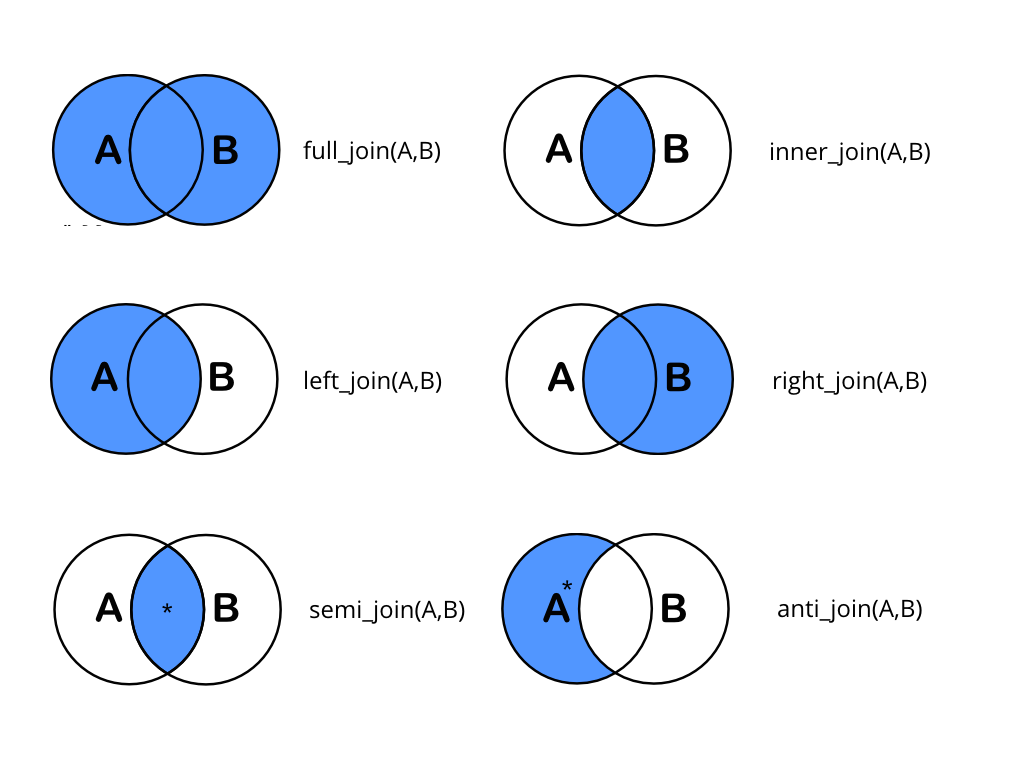

In [22]:
ref$tha1

adm1_pcode,adm1_name_th,adm1_label_th,adm1_name_th_regex,adm1_name_en,adm1_label_en,adm1_name_en_regex,is_agg,code_oae,HASC_1,lat,lon,alt,reg_oae,reg_oae_rank,reg_nesdb,reg_nesdb_rank,reg_osrt,reg_osrt_rank
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
TH00,ประเทศไทย,ประเทศไทย,.*ประเทศ,Thailand,Thailand,NA,TRUE,000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH01,ภาคเหนือ,เหนือ,(ภาค)เหนือ$,North,North,NA,TRUE,001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH02,ภาคตะวันออกเฉียงเหนือ,ตอ.เฉียงเหนือ,.*เฉียงเหนือ$,Northeast,Northeast,NA,TRUE,002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH03,ภาคกลาง,กลาง,.*กลาง$,Central,Central,NA,TRUE,003,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TH04,ภาคตะวันออก,ตะวันออก,.*ตะวันออก$,East,East,NA,TRUE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TH90,สงขลา,สงขลา,^(จ.)*สงขลา$,Songkhla,Songkhla,.*songkhla.*,FALSE,730,TH.SG,7.20,100.60,5.0,S,4,S,6,S,6
TH91,สตูล,สตูล,^(จ.)*สตูล$,Satun,Satun,.*satun.*,FALSE,740,TH.SA,6.88,99.79,7.0,S,4,S,6,S,6
TH94,ปัตตานี,ปัตตานี,^(จ.)*ปัตตานี$,Pattani,Pattani,.*pattani.*,FALSE,750,TH.PI,6.87,101.25,0.9,S,4,S,6,S,6


In [23]:
df_rds_subset <- df_rds %>%
  select(commod, subcommod, season, variety, province, area_harvest, production, yield_harvest)
df_rds_subset

commod,subcommod,season,variety,province,area_harvest,production,yield_harvest
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,ประเทศไทย,53383281,15757745,295.1813
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคเหนือ,12422132,5258621,423.3268
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคตะวันออกเฉียงเหนือ,26103169,5389709,206.4772
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคกลาง,11415444,4010097,351.2870
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคใต้,3442536,1099318,319.3338
...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อุตรดิตถ์,12568,7882,627.1483
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อำนาจเจริญ,510,237,464.7059
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อุบลราชธานี,40036,19877,496.4782


In [24]:
df_rds_subset %>%
  left_join(ref$tha1, by = c("province" = "adm1_name_th"))

commod,subcommod,season,variety,province,area_harvest,production,yield_harvest,adm1_pcode,adm1_label_th,adm1_name_th_regex,adm1_name_en,adm1_label_en,adm1_name_en_regex,is_agg,code_oae,HASC_1,lat,lon,alt,reg_oae,reg_oae_rank,reg_nesdb,reg_nesdb_rank,reg_osrt,reg_osrt_rank
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
ข้าว,ข้าวนาปี,1,ข้าวรวม,ประเทศไทย,53383281,15757745,295.1813,TH00,ประเทศไทย,.*ประเทศ,Thailand,Thailand,NA,TRUE,000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคเหนือ,12422132,5258621,423.3268,TH01,เหนือ,(ภาค)เหนือ$,North,North,NA,TRUE,001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคตะวันออกเฉียงเหนือ,26103169,5389709,206.4772,TH02,ตอ.เฉียงเหนือ,.*เฉียงเหนือ$,Northeast,Northeast,NA,TRUE,002,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคกลาง,11415444,4010097,351.2870,TH03,กลาง,.*กลาง$,Central,Central,NA,TRUE,003,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ข้าว,ข้าวนาปี,1,ข้าวรวม,ภาคใต้,3442536,1099318,319.3338,TH06,ใต้,.*ใต้.*,South,South,NA,TRUE,004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อุตรดิตถ์,12568,7882,627.1483,TH53,อุตรดิตถ์,^(จ.)*อุตรดิตถ์$,Uttaradit,Uttaradit,.*uttaradit.*,FALSE,120,TH.UD,17.61,100.10,64,N,1,N,1,N,1
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อำนาจเจริญ,510,237,464.7059,TH37,อำนาจเจริญ,^(จ.)*อำนาจ(เจริญ|เจิญ)$,Amnat Charoen,Amnat Charoen,.*amnat.*charoen.*,FALSE,270,TH.AC,15.86,104.63,249,NE,2,NE,2,NE,2
ข้าว,ข้าวเหนียวนาปรัง,2,ข้าวเหนียวรวม,อุบลราชธานี,40036,19877,496.4782,TH34,อุบลราชธานี,^(จ.)*อุบลราชธานี$,Ubon Ratchathani,Ubon Ratchathani,.*ubon.*ratchathani.*,FALSE,280,TH.UR,15.25,104.86,127,NE,2,NE,2,NE,2


# Reshape Data

![](https://github.com/gadenbuie/tidyexplain/blob/master/images/static/png/original-dfs-tidy.png?raw=true)

## pivot wider
แปลงข้อมูลจาก long format เป็น wide format

In [25]:
df_rds %>%
  filter(subcommod == "ข้าวนาปี", !is.na(reg_oae)) %>%
  pivot_wider(
    province,
    names_prefix = "year_",
    names_from = year,
    values_from = production
  ) %>%
  arrange(-year_2564)

province,year_2524,year_2525,year_2526,year_2527,year_2528,year_2529,year_2530,year_2531,year_2532,year_2533,year_2534,year_2535,year_2536,year_2537,year_2538,year_2539,year_2540,year_2541,year_2542,year_2543,year_2544,year_2545,year_2546,year_2547,year_2548,year_2549,year_2550,year_2551,year_2552,year_2553,year_2554,year_2555,year_2556,year_2557,year_2558,year_2559,year_2560,year_2561,year_2562,year_2563,year_2564
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
อุบลราชธานี,542679,485860,586619,665289,733582,700008,897789,742129,848140,909777,804965,821042,713897,741530,748398,686035,746471,743247,796490,857491,1034983,864197,865034,952143,970896,960100,981684,979196,1079125,1233350,1396344,1432101,1265989,1201818,1239110,1264065,1313057,1382578,1302467,1319811,1358635
นครสวรรค์,731955,623134,741473,721771,758774,700951,798258,842201,828101,469565,700644,723542,594785,740258,611482,717617,714440,714129,753399,988001,1045784,1065499,1152436,1141900,1275915,1195389,1258301,1273679,1221459,1129672,894002,1405702,1416140,1355321,1192895,1104562,1182867,1425335,1270411,1156046,1291118
นครราชสีมา,338263,418893,610933,618812,696466,515710,434178,638875,672785,431778,860128,689832,694305,689239,876813,862601,885008,774393,818435,871314,791458,909685,928823,961193,958338,928738,939499,925403,939810,1006952,1431024,1070390,1067623,1064465,1086735,1161219,1191036,1008611,748184,1009424,1088726
สุรินทร์,550548,583201,756218,586352,604321,612217,336945,584686,579007,676088,580569,704082,726365,847740,763871,613464,901210,607735,724760,840774,878421,846752,1031890,919317,994967,968064,969165,964785,1065103,1214083,1158148,1093665,1130219,1176400,1145706,1137952,1100917,979686,1076468,1049421,1079244
พิจิตร,478663,583594,564119,494570,536397,497127,387492,671286,561130,356995,490108,522502,426689,483205,419358,455349,590335,608679,447836,629393,757792,693584,721592,741005,776840,723626,723989,697865,692478,923660,783770,1106662,1107245,963196,875905,919785,876596,1041351,1033110,948681,1052021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
สมุทรสงคราม,1760,2053,1711,1760,1646,1426,1350,2821,2222,2760,2855,2645,2465,1913,2055,898,2092,2308,2173,1716,1492,1593,1739,1525,1623,1611,1608,835,1401,1638,2134,2272.0,2970,2639,2511,1852,1444,1544,1596,1540,1542
ชุมพร,42873,40263,29357,46916,45455,44612,23530,32529,34947,21251,29811,40154,44576,48858,43518,43458,38030,28953,26916,24777,18177,24948,23414,19849,17606,18043,14528,11872,2870,2578,2756,2498.0,2554,2333,1854,1626,1263,1190,1384,1410,1478
พังงา,17279,21062,12863,12097,12097,12722,7494,9787,10618,7599,5338,5436,6028,5828,5443,7555,7174,6075,6493,5375,2914,3332,3497,2743,2731,2797,2982,3001,1022,892,542,552.3,505,453,423,616,843,1041,906,936,993


## pivot longer
แปลงข้อมูลจาก wide format เป็น long format

In [26]:
df_rds %>%
  filter(subcommod == "ข้าวนาปี") %>%
  pivot_longer(
    area_plant:yield_harvest,
    names_to = "attribute",
    values_to = "value"
  ) %>%
  select(year_crop, subcommod, province, attribute, value)

year_crop,subcommod,province,attribute,value
<chr>,<chr>,<chr>,<chr>,<dbl>
2524/25,ข้าวนาปี,ประเทศไทย,area_plant,5.639223e+07
2524/25,ข้าวนาปี,ประเทศไทย,area_harvest,5.338328e+07
2524/25,ข้าวนาปี,ประเทศไทย,production,1.575774e+07
2524/25,ข้าวนาปี,ประเทศไทย,yield_plant,2.794311e+02
2524/25,ข้าวนาปี,ประเทศไทย,yield_harvest,2.951813e+02
...,...,...,...,...
2564/65,ข้าวนาปี,นราธิวาส,area_plant,40393.0000
2564/65,ข้าวนาปี,นราธิวาส,area_harvest,40293.0000
2564/65,ข้าวนาปี,นราธิวาส,production,18015.0000


# Other useful commands

- `dplyr::count`
- `tidyr::fill`
- etc.

## cheatsheet
![data import](https://github.com/rstudio/cheatsheets/blob/master/pngs/data-import.png?raw=true)
![dplyr](https://github.com/rstudio/cheatsheets/blob/master/pngs/data-transformation.png?raw=true)
![tidyr](https://github.com/rstudio/cheatsheets/blob/master/pngs/tidyr.png?raw=true)

# Save

In [27]:
df_rds %>% write_xlsx("data/df.xlsx")
df_rds %>% saveRDS("data/df.rds")

# Further Topics
- ข้อมูล Categorial ด้วย `forcat`
- ข้อมูลที่เป็น Date/Time และ time-series ด้วย `lubdridate` `xts` `tsibble` `timetk` `tsbox`
- ข้อมูล Spatial หรือ เชิงแผนที่ (vector และ raster) ด้วย `sp` `sf`